In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from datetime import datetime
import plotly.express as px

In [2]:
'''import requests
import csv
from datetime import datetime, timedelta

# Replace with your API key
API_KEY = " 56cdd10fcb5c468cbb4193934241803"

# Set the location and date range for historic weather data
location = input('enter location')
start_date = datetime(2024, 6, 13)  # Start date (YYYY, MM, DD)
end_date = datetime(2024, 6, 19)   # End date (YYYY, MM, DD)

# Set the base URL and parameters for the API request
base_url = "http://api.weatherapi.com/v1/history.json"
params = {
    "key": API_KEY,
    "q": location,
    "dt": start_date.strftime("%Y-%m-%d")
}

# Initialize an empty list to store weather data
weather_data = []

# Loop through the date range and fetch weather data for each day
current_date = start_date
while current_date <= end_date:
    params["dt"] = current_date.strftime("%Y-%m-%d")
    response = requests.get(base_url, params=params)
    
    if response.status_code == 200:
        data = response.json()
        for forecast in data["forecast"]["forecastday"]:
            for hour in forecast["hour"]:
                weather_data.append({
                    "Date": hour["time"].split(" ")[0],
                    "Time": hour["time"].split(" ")[1],
                    "Temperature (C)": hour["temp_c"],
                    "Humidity": hour["humidity"],
                    "Wind Speed (km/h)": hour["wind_kph"],
                    "Precipitation (mm)": hour["precip_mm"]
                })
    else:
        print(f"Error fetching data for {current_date}: {response.status_code} - {response.text}")
    
    current_date += timedelta(days=1)

# Save weather data to a CSV file
with open("historic_weather_data.csv", "w", newline="") as csvfile:
    fieldnames = ["Date", "Time", "Temperature (C)", "Humidity", "Wind Speed (km/h)", "Precipitation (mm)"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for data in weather_data:
        writer.writerow(data)

print(f"Historic weather data of {location} saved to historic_weather_data.csv")'''

Error fetching data for 2024-06-13 00:00:00: 400 - {"error":{"code":1008,"message":"API key is limited to get history data. Please check our pricing page and upgrade to higher plan."}}
Historic weather data of Patna saved to historic_weather_data.csv


In [3]:
weather01 = pd.read_csv('historic_weather_data.csv')
weather01

,Date,Time,Temperature (C),Humidity,Wind Speed (km/h),Precipitation (mm)
0,2024-06-14,00:00,33.3,58,24.5,0.00
1,2024-06-14,01:00,33.1,59,22.7,0.00
2,2024-06-14,02:00,33.4,57,20.5,0.00
3,2024-06-14,03:00,33.3,58,20.2,0.00
4,2024-06-14,04:00,32.5,61,14.8,0.00
...,...,...,...,...,...,...
139,2024-06-19,19:00,38.6,30,3.2,0.12
140,2024-06-19,20:00,35.6,47,25.9,0.00
141,2024-06-19,21:00,33.2,60,27.0,0.00
142,2024-06-19,22:00,32.6,62,25.9,0.00


In [4]:
weather01['datetime'] = pd.to_datetime(weather01['Date'] + ' ' + weather01['Time'])

weather01.drop(columns=['Date', 'Time'], inplace=True)
weather01

,Temperature (C),Humidity,Wind Speed (km/h),Precipitation (mm),datetime
0,33.3,58,24.5,0.00,2024-06-14 00:00:00
1,33.1,59,22.7,0.00,2024-06-14 01:00:00
2,33.4,57,20.5,0.00,2024-06-14 02:00:00
3,33.3,58,20.2,0.00,2024-06-14 03:00:00
4,32.5,61,14.8,0.00,2024-06-14 04:00:00
...,...,...,...,...,...
139,38.6,30,3.2,0.12,2024-06-19 19:00:00
140,35.6,47,25.9,0.00,2024-06-19 20:00:00
141,33.2,60,27.0,0.00,2024-06-19 21:00:00
142,32.6,62,25.9,0.00,2024-06-19 22:00:00


In [5]:
mpl.rcParams['figure.figsize'] = (15,6)


In [6]:
weather01= weather01.set_index('datetime')

In [7]:
weather01

,Temperature (C),Humidity,Wind Speed (km/h),Precipitation (mm)
datetime,,,,
2024-06-14 00:00:00,33.3,58,24.5,0.00
2024-06-14 01:00:00,33.1,59,22.7,0.00
2024-06-14 02:00:00,33.4,57,20.5,0.00
2024-06-14 03:00:00,33.3,58,20.2,0.00
2024-06-14 04:00:00,32.5,61,14.8,0.00
...,...,...,...,...
2024-06-19 19:00:00,38.6,30,3.2,0.12
2024-06-19 20:00:00,35.6,47,25.9,0.00
2024-06-19 21:00:00,33.2,60,27.0,0.00


In [8]:
weather01 = weather01.reset_index()[['datetime','Temperature (C)','Humidity','Wind Speed (km/h)','Precipitation (mm)']].rename({'datetime':'ds','Temperature (C)':'y'}, axis = 'columns')

In [9]:
fig = px.line(weather01, x='ds', y='y', title='Weather Data Over Time')
fig.show()

c:\Users\shree\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [10]:
'''import seaborn as sns
sns.lineplot(x = 'ds', y= 'y', data= weather01)'''

"import seaborn as sns\nsns.lineplot(x = 'ds', y= 'y', data= weather01)"

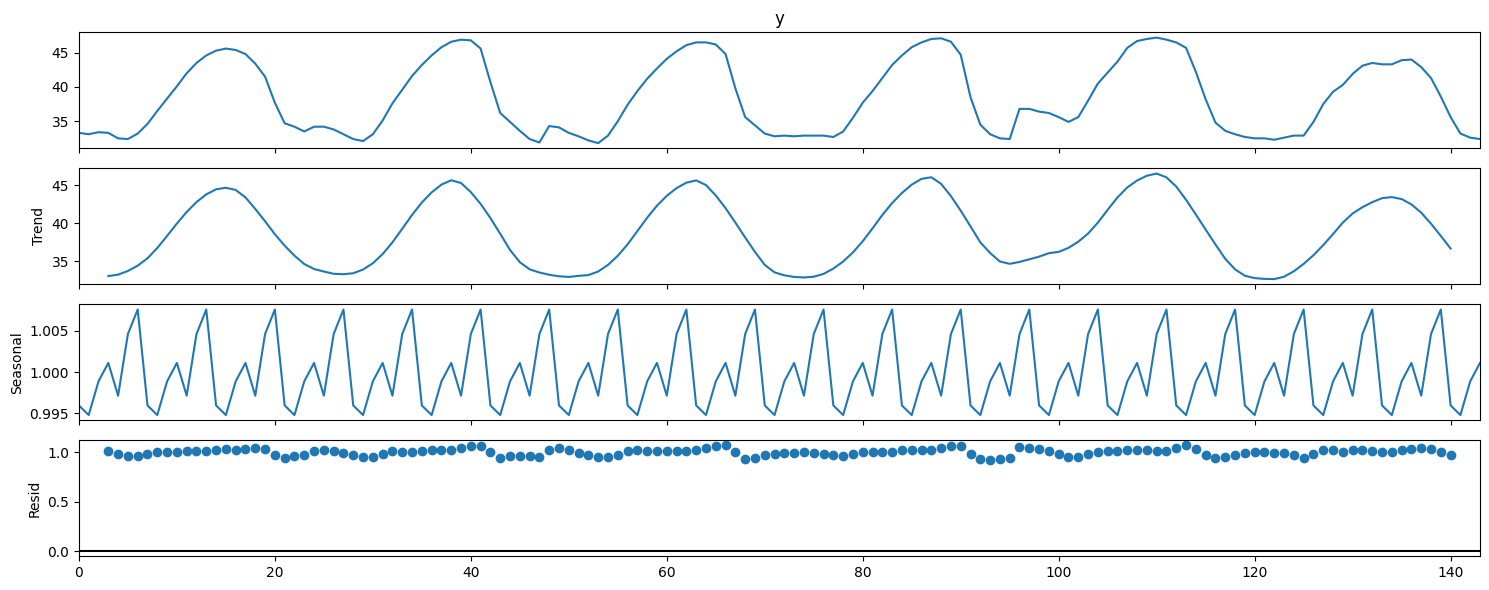

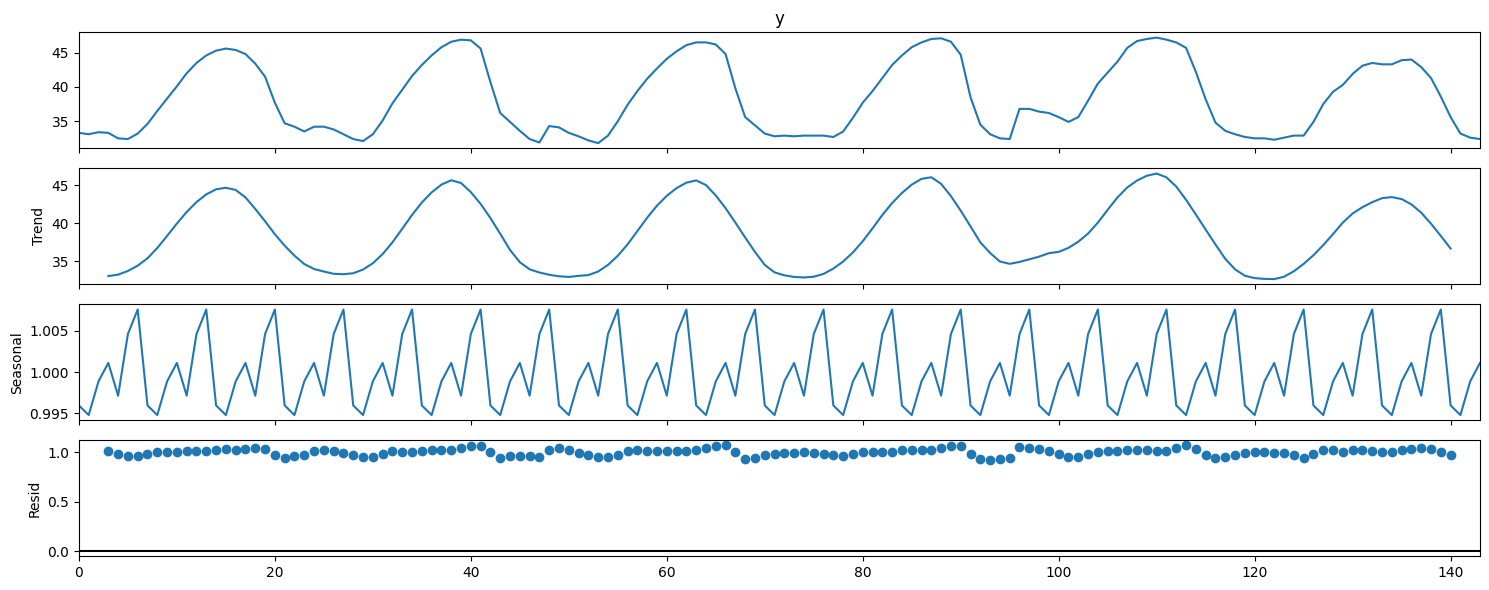

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
temperature = seasonal_decompose(weather01['y'] , model = 'multiplicative' , period = 7)
temperature.plot()



In [12]:
weather01.tail(50)

,ds,y,Humidity,Wind Speed (km/h),Precipitation (mm)
94,2024-06-17 22:00:00,32.5,64,32.8,0.00
95,2024-06-17 23:00:00,32.4,64,32.0,0.00
96,2024-06-18 00:00:00,36.8,38,11.9,0.00
97,2024-06-18 01:00:00,36.8,36,13.0,0.00
98,2024-06-18 02:00:00,36.4,36,10.4,0.00
99,2024-06-18 03:00:00,36.2,36,12.2,0.00
100,2024-06-18 04:00:00,35.6,38,7.9,0.00
101,2024-06-18 05:00:00,34.9,41,9.0,0.00
102,2024-06-18 06:00:00,35.6,41,10.1,0.00
103,2024-06-18 07:00:00,38.0,35,4.3,0.00


In [13]:
training_data = weather01[(weather01['ds'] >= '2024-06-13 00:00:00' )& (weather01['ds'] <= '2024-06-17 22:00:00')]
test_data = weather01[(weather01['ds'] > '2024-06-17 22:00:00')]
training_data.shape, test_data.shape # 70/30 split


((95, 5), (49, 5))

In [14]:
from prophet import  Prophet
m = Prophet()

In [15]:
m.fit(weather01)

15:19:22 - cmdstanpy - INFO - Chain [1] start processing
15:19:23 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
future = m.make_future_dataframe(periods=7)
future.tail()

,ds
146,2024-06-22 23:00:00
147,2024-06-23 23:00:00
148,2024-06-24 23:00:00
149,2024-06-25 23:00:00
150,2024-06-26 23:00:00


In [17]:
forecast= m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
149,2024-06-25 23:00:00,22.086185,19.743198,24.382368
150,2024-06-26 23:00:00,20.479241,17.557874,23.330690
151,2024-06-27 23:00:00,18.872296,15.432322,22.194761
152,2024-06-28 23:00:00,17.265352,13.202661,21.021581
153,2024-06-29 23:00:00,15.658408,10.724748,20.206562


In [18]:
from prophet.plot import plot_plotly
plot_plotly(m,forecast)

c:\Users\shree\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [19]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
149,2024-06-25 23:00:00,22.086185,19.743198,24.382368
150,2024-06-26 23:00:00,20.479241,17.557874,23.330690
151,2024-06-27 23:00:00,18.872296,15.432322,22.194761
152,2024-06-28 23:00:00,17.265352,13.202661,21.021581
153,2024-06-29 23:00:00,15.658408,10.724748,20.206562


c:\Users\shree\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\shree\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\shree\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



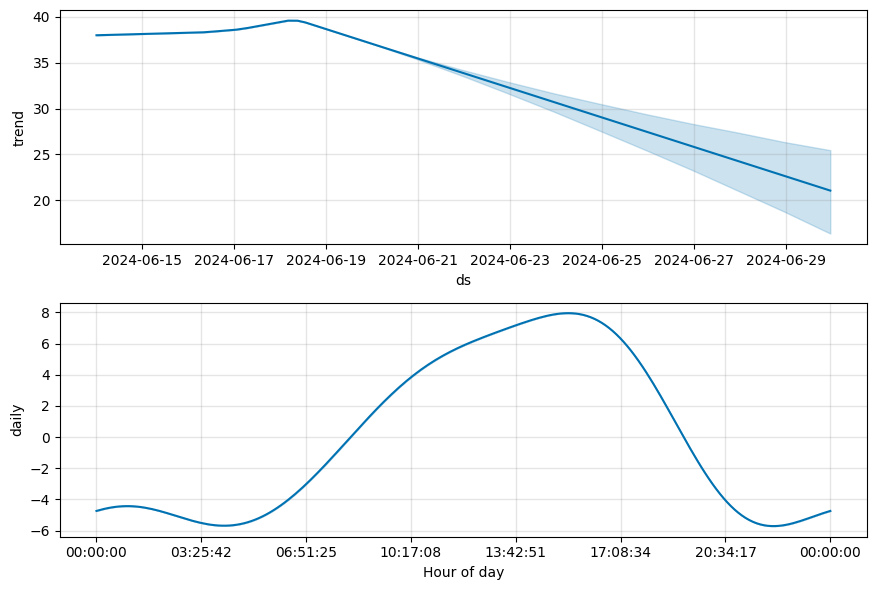

In [20]:
fig_2 = m.plot_components(forecast)

In [21]:
import pickle
with open('prophet.pkl','wb') as files:
    pickle.dump(m, files)


In [26]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from datetime import datetime

# ... your existing model fitting code (model = Prophet(), model.fit(df), etc.)

# User interaction and prediction
user_date_str = input("Enter the date and time you want to predict in YYYY-MM-DD HH:MM format (e.g., 2025-12-31 15:00:00): ")

try:
  user_date_time = datetime.strptime(user_date_str, "%Y-%m-%d %H:%M")
except ValueError:
  print("Invalid date and time format. Please enter YYYY-MM-DD HH:MM.")
  exit()

# Prophet works with dates, so extract the date part
user_date = user_date_time.date()

future_date = pd.DataFrame({'ds': [user_date]})

# Informational message about time being ignored

one_day_forecast = m.predict(future_date)
predicted_temp = one_day_forecast["yhat"].values[0]

print(f"Predicted temperature for {user_date_str} is: {predicted_temp:.2f}")


Predicted temperature for 2024-06-01 15:00 is: 31.39
